**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 72.4MB/s]


In [ ]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences = True)))# An LSTM Layer)
model.add(Dropout(0.2))# A dropout layer)
model.add(LSTM(100))# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# Pick a loss function and an optimizer)
### END CODE HERE

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1605)              162105    
                                                                 
 dense_1 (Dense)             (None, 3211)              5156866   
                                                        

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 21s 25ms/step - loss: 6.9057 - accuracy: 0.0233
Epoch 2/100
484/484 [==============================] - 12s 26ms/step - loss: 6.4993 - accuracy: 0.0220
Epoch 3/100
484/484 [==============================] - 12s 26ms/step - loss: 6.3942 - accuracy: 0.0252
Epoch 4/100
484/484 [==============================] - 12s 26ms/step - loss: 6.2691 - accuracy: 0.0287
Epoch 5/100
484/484 [==============================] - 12s 25ms/step - loss: 6.1711 - accuracy: 0.0366
Epoch 6/100
484/484 [==============================] - 12s 25ms/step - loss: 6.0870 - accuracy: 0.0397
Epoch 7/100
484/484 [==============================] - 12s 25ms/step - loss: 6.0001 - accuracy: 0.0411
Epoch 8/100
484/484 [==============================] - 12s 25ms/step - loss: 5.9068 - accuracy: 0.0482
Epoch 9/100
484/484 [==============================] - 12s 26ms/step - loss: 5.8007 - accuracy: 0.0528
Epoch 10/100
484/484 [==============================] - 12s 25ms/step - l

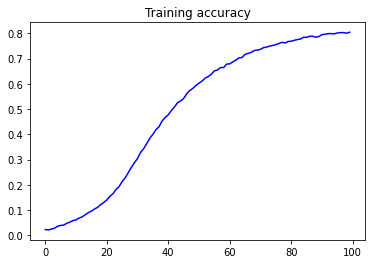

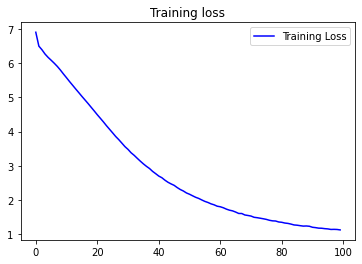

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

AttributeError: ignored